# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization.
Also, applying a logistic regression model to predict which passengers who are more likely to survive in a separate test set. 

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# grid search for model selection
from sklearn.model_selection import GridSearchCV

# linear regression
from sklearn.linear_model import LogisticRegression

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Baclini, Mrs. Solomon (Latifa Qurban)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Finding the number of missing values for each column**


In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Answer 1: Columns 'Age' , 'Cabin' , 'Embarked' are missing 177,687,2 values respectively  

**Imputing missing values**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [ ]:
# age - mean
titanic['Age'] = np.where(titanic['Age'].isna(),titanic['Age'].mean(),titanic['Age'])

# cabin - 'other'
titanic['Cabin'] = np.where(titanic['Cabin'].isna(),'Other',titanic['Cabin'])

# Embarked - mode
titanic['Embarked'] = np.where(titanic['Embarked'].isna(),titanic['Embarked'].mode(),titanic['Embarked'])

In [ ]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **Examining the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [ ]:
 titanic_pivot =  pd.pivot_table(titanic, 
                       values = ['Survived'] , #column to aggregate on 
                       index = ['Sex','Pclass'], #grouper
                       aggfunc = np.mean,
                       margins = True) 
 titanic_pivot

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447
All            0.383838



Findings:
1. Overall only 38.38% have survived.
2. Females had a better survival rate than males overall.
3. Females who had a first class ticket had the highest survival rate followed by females of class 2
4. Males from class 1 and class 3 ticket had less chance of survival.
5. Males from class 2 had the least survival rate.

### **Is Age or Fare an important factor to one's chance of survival?**


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

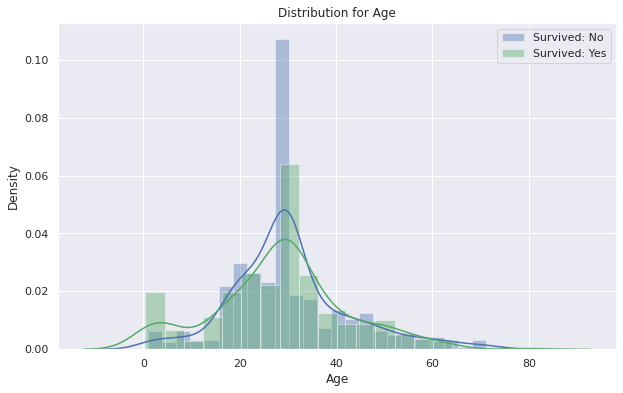

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

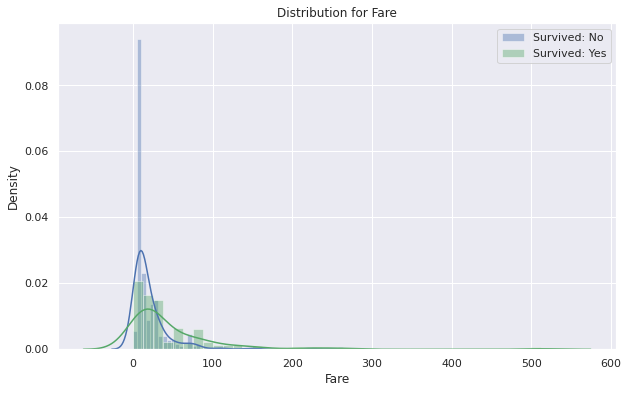

In [ ]:
 def distplot(feature, frame):
    plt.figure(figsize=(10,6))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'b', label='Survived: No')
    ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'g', label='Survived: Yes')
    plt.legend()
    plt.show()

display(titanic['Age'].describe())
distplot('Age', titanic)

display(titanic['Fare'].describe())
distplot('Fare', titanic)

'Fare' seems to be a better factor to determine one's chance of survival as the distribution shows that at lower fare the chance of survival is less. On the other hand, for the distribution for age the distribution's for both survived and not-survived is almost similar.

### **Calculating and visualizing the survival rate for discrete columns**


In [ ]:
 titanic_sibsp =  pd.pivot_table(titanic, 
                       values = ['Survived'] , #column to aggregate on 
                       index = ['SibSp'], #grouper
                       aggfunc = np.mean,
                       margins = True) 
 titanic_sibsp

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000
All,0.383838


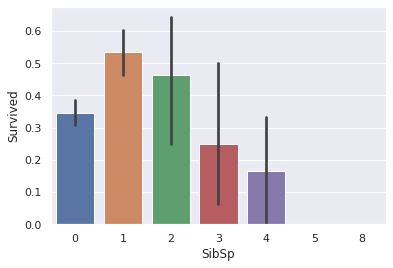

In [ ]:
ax = sns.barplot(x="SibSp", y="Survived", data=titanic)

In [ ]:
titanic_parch =  pd.pivot_table(titanic, 
                       values = ['Survived'] , #column to aggregate on 
                       index = ['Parch'], #grouper
                       aggfunc = np.mean,
                       margins = True) 
titanic_parch

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000
All,0.383838


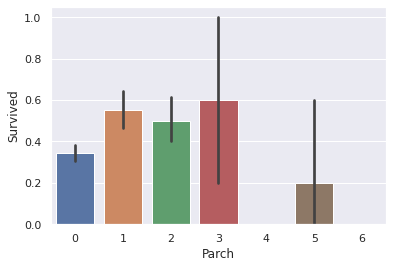

In [ ]:
ax = sns.barplot(x="Parch", y="Survived", data=titanic)

### **Finding the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,1.000000,0.018305,1.000000,-0.042939,0.123648,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030467,-0.005007
Pclass,0.018305,1.000000,0.018305,0.118133,0.171190,-0.149630,-0.000343,0.020431,0.079498,0.187437,-0.168091,0.247845
Name,1.000000,0.018305,1.000000,-0.042939,0.123648,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030467,-0.005007
Sex,-0.042939,0.118133,-0.042939,1.000000,0.005005,-0.046152,0.242417,-0.132709,0.137725,0.082104,0.116569,0.543351
Age,0.123648,0.171190,0.123648,0.005005,1.000000,0.010067,0.132659,0.074814,0.117313,0.163002,-0.133308,0.037025
SibSp,-0.031023,-0.149630,-0.031023,-0.046152,0.010067,1.000000,0.165255,-0.122426,-0.046556,-0.108709,-0.030683,-0.136302
Parch,0.001206,-0.000343,0.001206,0.242417,0.132659,0.165255,1.000000,-0.262607,0.074306,-0.002761,-0.085059,0.086210
Ticket,0.760875,0.020431,0.760875,-0.132709,0.074814,-0.122426,-0.262607,1.000000,0.303257,0.212438,-0.024655,-0.047298
Fare,0.299982,0.079498,0.299982,0.137725,0.117313,-0.046556,0.074306,0.303257,1.000000,0.379659,0.076726,0.191981
Cabin,0.241918,0.187437,0.241918,0.082104,0.163002,-0.108709,-0.002761,0.212438,0.379659,1.000000,0.017685,0.270495


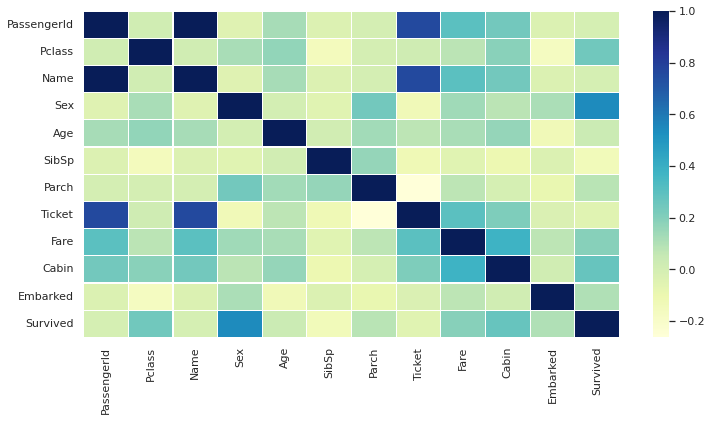

In [ ]:
plt.figure(figsize=(12, 6))
corr = titanic[['PassengerId','Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Pclass,1.000000,0.118133,0.171190,-0.149630,-0.000343,0.079498,0.187437,-0.168091,0.247845
Sex,0.118133,1.000000,0.005005,-0.046152,0.242417,0.137725,0.082104,0.116569,0.543351
Age,0.171190,0.005005,1.000000,0.010067,0.132659,0.117313,0.163002,-0.133308,0.037025
SibSp,-0.149630,-0.046152,0.010067,1.000000,0.165255,-0.046556,-0.108709,-0.030683,-0.136302
Parch,-0.000343,0.242417,0.132659,0.165255,1.000000,0.074306,-0.002761,-0.085059,0.086210
Fare,0.079498,0.137725,0.117313,-0.046556,0.074306,1.000000,0.379659,0.076726,0.191981
Cabin,0.187437,0.082104,0.163002,-0.108709,-0.002761,0.379659,1.000000,0.017685,0.270495
Embarked,-0.168091,0.116569,-0.133308,-0.030683,-0.085059,0.076726,0.017685,1.000000,0.106811
Survived,0.247845,0.543351,0.037025,-0.136302,0.086210,0.191981,0.270495,0.106811,1.000000


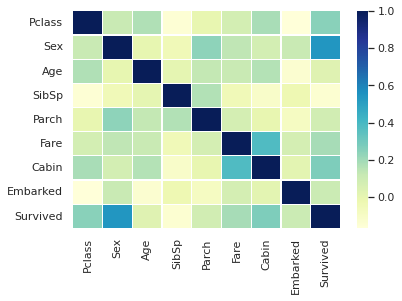

In [ ]:
corr = titanic[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked','Survived']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

The following can be observed from the correlation metrics.

1. The 'Sex' of the passenger has the highest positive linear correlation with Survival rate.
2. Class of the passenger is weakly positively correlated. Higher the class higher the chance of survival. 
3. SibSp is has a weak negetive correlation with Survived.Hence,less number of siblings is associated with higher chances of survival.
4. Parch an Age also has no linear correlation with Survival Rate.

**Further analyzing 'Embarked' and 'Sex' from the dataset**

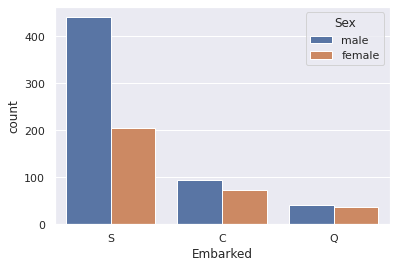

In [ ]:
#Embarked had only 2 missing values, which was replaced by Mode in earlier code
#Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)
sns.countplot(x="Embarked",hue="Sex", data=titanic)

Most of the passengers embarked from Southampton and at each port there were more male passengers than female.

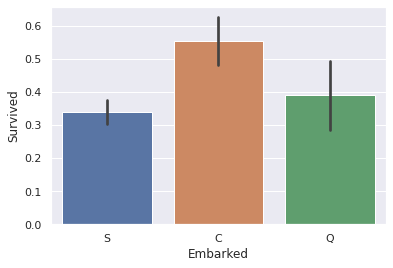

In [ ]:
sns.barplot(x="Embarked", y="Survived",data=titanic)

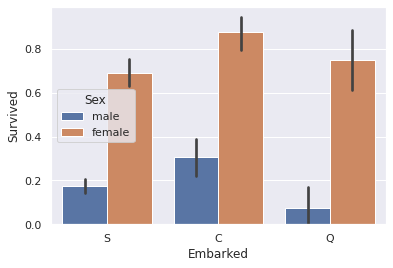

In [ ]:
sns.barplot(x="Embarked", y="Survived",data=titanic,hue='Sex')

It can be concluded that the survival rate of people who embarked from Cherbourg is more than other two ports and in all cases the females had a better survival rate.

### **Building a ML model to predict survival.**
Predicting the probability of survival and its accuracy for all the passengers in  [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)

In [ ]:
titanic_test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
display(titanic_test.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Checking for Missing Values in Test Data

In [ ]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

1. Replacing missing values in 'Age' with mean of values in other columns
2. Replacing missing cabin values with 'other'
3. Removing the record with missing value for Fare

In [ ]:
# age - mean
titanic_test['Age'] = np.where(titanic_test['Age'].isna(),titanic_test['Age'].mean(),titanic_test['Age'])
# cabin - 'other'
titanic_test['Cabin'] = np.where(titanic_test['Cabin'].isna(),'Other',titanic_test['Cabin'])

#titanic_test[titanic_test['Fare'].isna()]
titanic_test.drop(axis = 0, index=152,inplace=True)

In [ ]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Dropping Features which wont be used in the model

In [ ]:
titanic_test.drop('Parch', axis=1, inplace=True)
titanic_test.drop('Cabin', axis=1, inplace=True)
titanic_test.drop('PassengerId', axis=1, inplace=True)
titanic_test.drop('Name', axis=1, inplace=True)
titanic_test.drop('Ticket', axis=1, inplace=True)

Creating Dummy Variables for the categorical values in the test set

In [ ]:
titanic_test = pd.get_dummies(titanic_test, columns=["Pclass","Embarked","Sex","SibSp"])

Transforming the training set to fit the model

In [ ]:
titanic_train = titanic
titanic_train.drop('PassengerId', axis=1, inplace=True)
titanic_train.drop('Name', axis=1, inplace=True)
titanic_train.drop('Ticket', axis=1, inplace=True)
titanic_train.drop('Cabin', axis=1, inplace=True)
titanic_train.drop('Parch', axis=1, inplace=True)
titanic_train = pd.get_dummies(titanic_train, columns=["Pclass","Embarked","Sex","SibSp"])

In [ ]:
titanic_train.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8'],
      dtype='object')

In [ ]:
train_x = titanic_train.loc[:,['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8']]
train_y = titanic_train.loc[:,["Survived"]]


Fitting the Logistic Regression Model

In [ ]:
# model initialization
logistic_regression_model = LogisticRegression()

# train the model
logistic_regression_model.fit(train_x, train_y)

# print model parameters
print('Slope: {}'.format(logistic_regression_model.coef_))
print('Intercept: {}'.format(logistic_regression_model.intercept_))

Slope: [[-0.03848676  0.00170048  1.12162975  0.14582777 -1.01253847  0.13863109
   0.33584861 -0.21956065  1.41120807 -1.15628902  0.77608797  0.91416475
   0.32003847 -0.6797276  -0.43084178 -0.25413273 -0.39067003]]
Intercept: [0.32897932]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
train_z = logistic_regression_model.predict(train_x)

In [ ]:
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))

model accuracy on train set: 0.8114478114478114


In [ ]:
test_z = logistic_regression_model.predict(titanic_test)

In [ ]:
test_z

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
titanic_test_initial = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
new_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
new_df['Survived'] = test_z
new_df['PassengerId'] = titanic_test_initial.PassengerId
new_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
412,1304,0
413,1305,1
414,1306,0
415,1307,0
